<a href="https://colab.research.google.com/github/NamrataBDutta/Machine-Learning-Projects/blob/main/MarketBasketAnalysis_Association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MarketBasketAnalysis-Apriori Algorithm

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [27]:
df=pd.read_csv('/content/Online Retail.csv',encoding='latin1')
df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/2010 8:34,1.69,13047.0,United Kingdom


## Data Preparation

In [4]:
df.shape

(99103, 8)

In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99103 entries, 0 to 99102
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    99103 non-null  object 
 1   StockCode    99103 non-null  object 
 2   Description  98805 non-null  object 
 3   Quantity     99102 non-null  float64
 4   InvoiceDate  99102 non-null  object 
 5   UnitPrice    99102 non-null  float64
 6   CustomerID   64576 non-null  float64
 7   Country      99102 non-null  object 
dtypes: float64(3), object(5)
memory usage: 6.0+ MB


In [7]:
df.isna().sum()

InvoiceNo          0
StockCode          0
Description      298
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     34527
Country            1
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df['InvoiceNo']=df['InvoiceNo'].astype('str')
df=df[~df['InvoiceNo'].str.contains('C')]

In [10]:
df.shape

(62808, 8)

In [11]:
df.duplicated().sum()

896

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(61912, 8)

In [14]:
df['Country'].value_counts()

United Kingdom          54753
Germany                  1524
France                   1429
EIRE                      852
Spain                     553
Netherlands               490
Portugal                  277
Belgium                   257
Cyprus                    254
Australia                 237
Switzerland               235
Norway                    179
Italy                     161
Japan                     150
Sweden                     72
Poland                     61
Iceland                    60
Channel Islands            57
Singapore                  56
Lebanon                    45
Denmark                    40
Lithuania                  35
Greece                     32
United Arab Emirates       30
Austria                    29
Finland                    28
Israel                     16
Name: Country, dtype: int64

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,61912.000000,61912.000000,61912.000000
mean,14.215047,3.148638,15348.416801
std,302.493150,5.287210,1772.537562
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13869.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,17017.000000
max,74215.000000,320.690000,18283.000000


<AxesSubplot:>

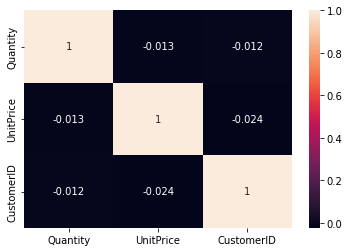

In [16]:
sns.heatmap(df.corr(),annot=True)

## EDA with DTale Library

In [17]:
pip install dtale

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 KB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 KB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━

In [18]:
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True 

In [19]:
dtale.show(df)

https://ckme0bc9rzd-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

In [20]:
df['Country'].value_counts()

United Kingdom          54753
Germany                  1524
France                   1429
EIRE                      852
Spain                     553
Netherlands               490
Portugal                  277
Belgium                   257
Cyprus                    254
Australia                 237
Switzerland               235
Norway                    179
Italy                     161
Japan                     150
Sweden                     72
Poland                     61
Iceland                    60
Channel Islands            57
Singapore                  56
Lebanon                    45
Denmark                    40
Lithuania                  35
Greece                     32
United Arab Emirates       30
Austria                    29
Finland                    28
Israel                     16
Name: Country, dtype: int64

Seperating transaction for Country Germany

In [43]:
my_basket=df[df['Country']=='Germany'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [44]:
my_basket.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#converting all positive values to 1 and everything else to 0
def my_encode_units(x):
  if x<=0:
    return 0
  else:
    return 1
my_basket_sets=my_basket.applymap(my_encode_units)

## Training Model

In [46]:
my_frequent_itemsets=apriori(my_basket_sets,min_support=0.07,use_colnames=True)

In [47]:
#generating rules
my_rules=association_rules(my_frequent_itemsets,metric='lift', min_threshold=1)

In [53]:
my_rules.head(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE ),0.620232,0.087894,0.076285,0.122995,1.399354,0.021771,1.040023
1,(PLASTERS IN TIN CIRCUS PARADE ),(POSTAGE),0.087894,0.620232,0.076285,0.867925,1.399354,0.021771,2.875385
2,(PLASTERS IN TIN SPACEBOY),(POSTAGE),0.081260,0.620232,0.076285,0.938776,1.513587,0.025885,6.202875
3,(POSTAGE),(PLASTERS IN TIN SPACEBOY),0.620232,0.081260,0.076285,0.122995,1.513587,0.025885,1.047587
4,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.104478,0.620232,0.089552,0.857143,1.381971,0.024752,2.658375
5,(POSTAGE),(PLASTERS IN TIN WOODLAND ANIMALS),0.620232,0.104478,0.089552,0.144385,1.381971,0.024752,1.046642


## Making Recommendation

In [54]:
my_basket_sets['POSTAGE'].sum()

63

In [57]:
my_basket_sets['PLASTERS IN TIN SPACEBOY'].sum()

49

In [58]:
my_rules[(my_rules['lift']>3) & (my_rules['confidence']>=0.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(ROUND SNACK BOXES SET OF 4 FRUITS ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.119403,0.185738,0.099502,0.833333,4.486607,0.077325,4.885572
15,(ROUND SNACK BOXES SET OF4 WOODLAND ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.185738,0.119403,0.099502,0.535714,4.486607,0.077325,1.896670
17,"(ROUND SNACK BOXES SET OF 4 FRUITS , POSTAGE)",(ROUND SNACK BOXES SET OF4 WOODLAND ),0.114428,0.185738,0.094527,0.826087,4.447593,0.073274,4.682007
18,"(ROUND SNACK BOXES SET OF4 WOODLAND , POSTAGE)",(ROUND SNACK BOXES SET OF 4 FRUITS ),0.170813,0.119403,0.094527,0.553398,4.634709,0.074132,1.971772
19,(ROUND SNACK BOXES SET OF 4 FRUITS ),"(ROUND SNACK BOXES SET OF4 WOODLAND , POSTAGE)",0.119403,0.170813,0.094527,0.791667,4.634709,0.074132,3.980100
20,(ROUND SNACK BOXES SET OF4 WOODLAND ),"(ROUND SNACK BOXES SET OF 4 FRUITS , POSTAGE)",0.185738,0.114428,0.094527,0.508929,4.447593,0.073274,1.803347
